<h2>TRAIN.CSV</h2>

<h4>14993 linhas e 24 colunas</h4>

<h3>Data Fields</h3>
<p><b>PetID -</b> Unique hash ID of pet profile</p>
<p><b>AdoptionSpeed -</b> Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.</p>
<hr>

<p style="color:blue;"><b>0 </b> Pet was adopted on the same day as it was listed</p> 
<p style="color:blue;"><b>1 </b> Pet was adopted between 1 and 7 days (1st week) after being listed</p> 
<p style="color:blue;"><b>2 </b> Pet was adopted between 8 and 30 days (1st month) after being listed</p> 
<p style="color:blue;"><b>3 </b> Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed</p> 
<p style="color:blue;"><b>4 </b> No adoption after 100 days of being listed</p> 

<p><b>(There are no pets in this dataset that waited between 90 and 100 days)</b></p>
    
<hr>
<p><b>Type -</b> Type of animal (1 = Dog, 2 = Cat)</p>
<p><b>Name -</b> Name of pet (Empty if not named)</p>
<p><b>Age -</b> Age of pet when listed, in months</p>
<p><b>Breed1 -</b> Primary breed of pet (Refer to BreedLabels dictionary)</p>
<p><b>Breed2 -</b> Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)</p>
<p><b>Gender -</b> Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)</p>
<p><b>Color1 -</b> Color 1 of pet (Refer to ColorLabels dictionary)</p>
<p><b>Color2 -</b> Color 2 of pet (Refer to ColorLabels dictionary)</p>
<p><b>Color3 -</b> Color 3 of pet (Refer to ColorLabels dictionary)</p>
<p><b>MaturitySize -</b> Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)</p>
<p><b>FurLength -</b> Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)</p>
<p><b>Vaccinated -</b> Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Dewormed -</b> Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Sterilized -</b> Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)</p>
<p><b>Health -</b> Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)</p>
<p><b>Quantity -</b> Number of pets represented in profile</p>
<p><b>Fee -</b> Adoption fee (0 = Free)</p>
<p><b>State -</b> State location in Malaysia (Refer to StateLabels dictionary)</p>
<p><b>RescuerID -</b> Unique hash ID of rescuer</p>
<p><b>VideoAmt -</b> Total uploaded videos for this pet</p>
<p><b>PhotoAmt -</b> Total uploaded photos for this pet</p>
<p><b>Description -</b> Profile write-</b>up for this pet. The primary language used is English, with some in Malay or Chinese.</p>

In [86]:
import pandas as pd

In [132]:
import matplotlib.pyplot as plt

In [133]:
import numpy as np

In [14]:
pd.set_option("display.max_columns", 25)

In [15]:
train = pd.read_csv('datasets/train.csv', delimiter=',')
train.sample(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
4120,1,Roscoe,8,307,0,1,1,2,0,2,1,3,3,1,1,1,0,41326,aa66486163b6cbc25ea62a34b11c9b91,0,This lovely boy was wearing a black collar whe...,86d87d5f7,2.0,4
9727,1,Zone F1 A2,36,307,0,1,1,2,0,2,2,1,1,3,1,1,0,41326,37237ca3633d20c004ec76c0c2ddb4b7,0,I need a new home!! Contact Furry Friends Farm...,d202e4c9c,3.0,4
4966,1,Gigi,24,109,0,2,3,0,0,3,2,1,1,2,1,1,400,41401,bd591197957f4994a9741d700ee01b11,0,she so clever and smart....active dog.,e470b6bd3,24.0,3


In [52]:
pd.options.display.max_rows

60

In [53]:
total_pets = train.shape[0]
total_pets

14993

In [48]:
#plots, mean, std, var e norm


In [114]:
# VELOCIDADE DE ADOÇÃO -----------------------------------------------------------------------------------------------------
#velocidade de adoção (0): no primeiro DIA (0)
qtd_adoption_speed_0 = train.AdoptionSpeed[train.AdoptionSpeed == 0].count()
percent_adoption_speed_0 = (qtd_adoption_speed_0 / total_pets) * 100

print('pets adotados: ',qtd_adoption_speed_0)
print('%', percent_adoption_speed_0)

pets adotados:  410
% 2.7346094844260658


In [115]:
#velocidade de adoção (1): no primeira SEMANA (1 - 7)
qtd_adoption_speed_1 = train.AdoptionSpeed[train.AdoptionSpeed == 1].count()
percent_adoption_speed_1 = (qtd_adoption_speed_1 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_1)
print('%', percent_adoption_speed_1)

pets adotados:  3090
% 20.609617821650104


In [116]:
#velocidade de adoção(2):  8 - 30
qtd_adoption_speed_2 = train.AdoptionSpeed[train.AdoptionSpeed == 2].count()
percent_adoption_speed_2 = (qtd_adoption_speed_2 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_2)
print('%', percent_adoption_speed_2)

pets adotados:  4037
% 26.92589875275128


In [117]:
#velocidade de adoção(3):  31 - 90
qtd_adoption_speed_3 = train.AdoptionSpeed[train.AdoptionSpeed == 3].count()
percent_adoption_speed_3 = (qtd_adoption_speed_3 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_3)
print('%', percent_adoption_speed_3)

pets adotados:  3259
% 21.736810511572067


In [119]:
#velocidade de adoção(4):  + 100
qtd_adoption_speed_4 = train.AdoptionSpeed[train.AdoptionSpeed == 4].count()
percent_adoption_speed_4 = (qtd_adoption_speed_4 / total_pets) * 100
print('pets adotados: ',qtd_adoption_speed_4)
print('%', percent_adoption_speed_4)

pets adotados:  4197
% 27.99306342960048


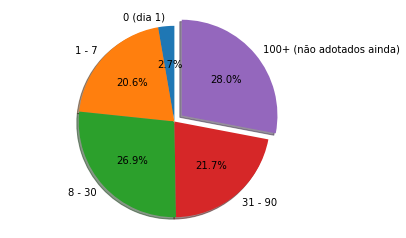

In [124]:
#GRÁFICO ADOPTION SPEED 

labels_adoption_speed = '0 (dia 1)', '1 - 7','8 - 30', '31 - 90', '100+ (não adotados ainda)' 
sizes_adoption_speed = [qtd_adoption_speed_0, qtd_adoption_speed_1, qtd_adoption_speed_2, qtd_adoption_speed_3, qtd_adoption_speed_4]
explode_adoption_speed = (0, 0, 0, 0, 0.1) 

fig_adoption_speed, ax_adoption_speed = plt.subplots()
ax_adoption_speed.pie(sizes_adoption_speed, explode=explode_adoption_speed, labels=labels_adoption_speed, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_adoption_speed.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
# QUANTIDADE DE CÃES E GATOS -------------------------------------------------------------------------------------------

In [41]:
#cães
qtd_caes = train.Type[train.Type == 1].count()
qtd_caes

8132

In [39]:
#gatos
qtd_gatos = train.Type[train.Type == 2].count()
qtd_gatos

6861

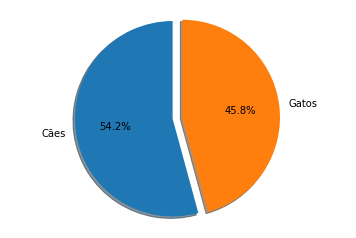

In [105]:
#GRÁFICO: CÃES E GATOS
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Cães', 'Gatos'
sizes2 = [qtd_caes, qtd_gatos]
explode2 = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [111]:
# IDADE --------------------------------------------------------------------------------------------------------
#Média de idade (meses)
media_idade_geral = train.Age.mean()
media_idade_geral

10.452077636230241

In [107]:
#Média de idade dos cães (meses)

media_idade_caes = train.Age[train.Type == 1].mean()
media_idade_caes

12.906173143138219

In [108]:
#Média de idade dos gatos (meses)
media_idade_gatos = train.Age[train.Type == 2].mean()
media_idade_gatos

7.543361026089491

In [109]:
#mais velho (anos)
pet_mais_velho = train.Age.max() / 12
pet_mais_velho

21.25

In [127]:
#mais novo (meses)
pet_mais_novo = train.Age.min() 
pet_mais_novo

0

Text(0.5, 0.98, 'Idades')

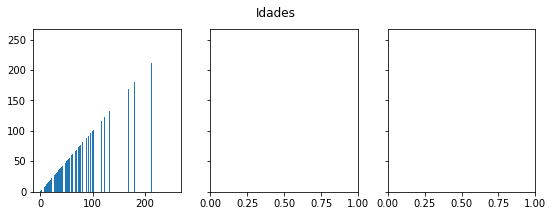

In [138]:
#GRÁFICO DE IDADES
data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}

names_idades_bar = list(train.Age)
values_idades_bar = list(train.Age)

fig_idades_bar, axs_idades_bar = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs_idades_bar[0].bar(names_idades_bar, values_idades_bar)

fig_idades_bar.suptitle('Idades')

In [171]:
#GENDER ------------------------------------------------------------------------------

#macho
total_macho = train.Gender[train.Gender ==1].count()
total_macho

5536

In [169]:
#femea
total_femea = train.Gender[train.Gender ==2].count()
total_femea

7277

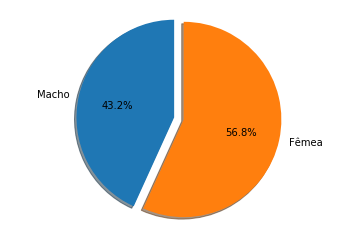

In [172]:
#GRÁFICO MACHO E FEMEA
labels_gender = 'Macho', 'Fêmea'
sizes_gender = [total_macho, total_femea]
explode_gender = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig_gender, ax_gender = plt.subplots()
ax_gender.pie(sizes_gender, explode=explode_gender, labels=labels_gender, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax_gender.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




In [88]:
# FEE (TAXA DE ADOÇAÕ)--------------------------------------------------------------------------------------------------------
#grátis
qtd_fee_gratis = train.Fee[train.Fee == 0].count()
percent_fee_gratis = (qtd_fee_gratis / total_pets) * 100
print('total taxa grátis:',qtd_fee_gratis)
print('%', percent_fee_gratis)



total taxa grátis: 12663
% 84.45941439338358


In [87]:
#pago
qtd_fee_pago = train.Fee[train.Fee > 0].count()
percent_fee_pago = (qtd_fee_pago / total_pets) * 100
print('total taxa pago:',qtd_fee_pago)
print('%', percent_fee_pago)


total taxa pago: 2330
% 15.540585606616423


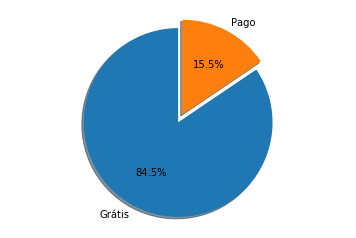

In [99]:
#GRÁFICO: PAGO E GRÁTIS
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Grátis', 'Pago'
sizes = [qtd_fee_gratis, qtd_fee_pago]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
